In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, sklearn, IPython.display as ipd
import librosa, librosa.display
import warnings
warnings.simplefilter("ignore")

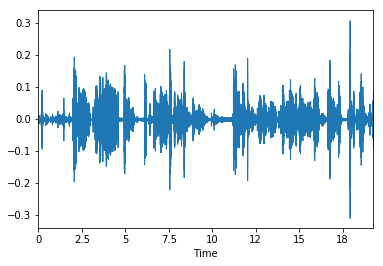

In [29]:
x, sr = librosa.load('ZOOM0009.WAV')

librosa.display.waveplot(x, sr=sr)

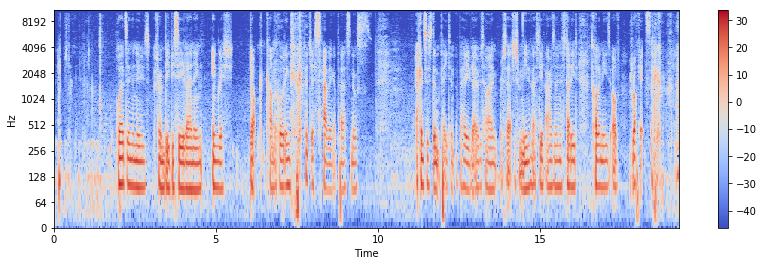

In [19]:

S = librosa.stft(x)
S_db = librosa.amplitude_to_db(abs(S))
plt.figure(figsize=(14, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()
plt.show()


In [22]:
X, X_phase = librosa.magphase(S)
n_components = 10
W, H = librosa.decompose.decompose(X, n_components=n_components, sort=True)

In [23]:

print(W.shape)
print(H.shape)

(1025, 10)
(10, 830)


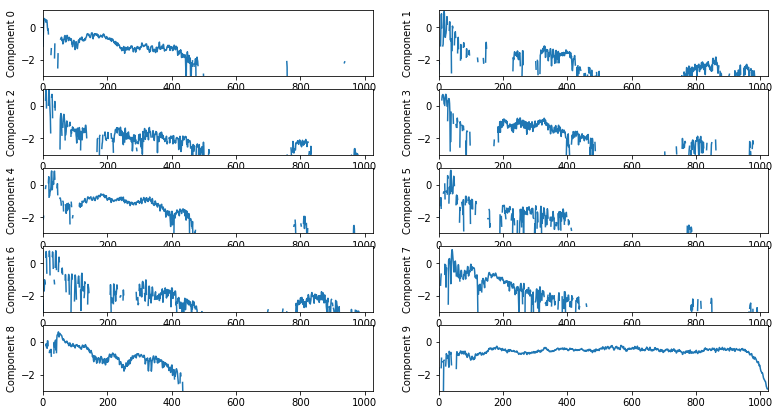

In [24]:
plt.figure(figsize=(13, 7))
logW = numpy.log10(W)
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(logW[:,n])
    plt.ylim(-3, logW.max())
    plt.xlim(0, W.shape[0])
    plt.ylabel('Component %d' % n)

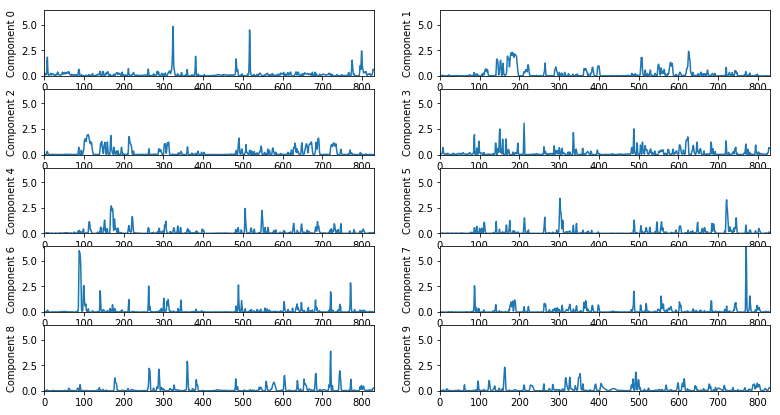

In [25]:
plt.figure(figsize=(13, 7))
for n in range(n_components):
    plt.subplot(numpy.ceil(n_components/2.0), 2, n+1)
    plt.plot(H[n])
    plt.ylim(0, H.max())
    plt.xlim(0, H.shape[1])
    plt.ylabel('Component %d' % n)

In [10]:

for n in range(n_components):
    
    # Re-create the STFT of a single NMF component.
    Y = scipy.outer(W[:,n], H[n])*X_phase
    
    # Transform the STFT into the time domain.
    y = librosa.istft(Y)
    
    print('Component {}:'.format(n))
    fname="output_"+str(n)+".wav"
    print(fname)
    librosa.output.write_wav(fname, y, sr)

Component 0:
output_0.wav
Component 1:
output_1.wav
Component 2:
output_2.wav


In [26]:

W=W[:,[0,1,2,3,4,5,6,7,8,9]]
H=H[[0,1,2,3,4,5,6,7,8,9],:]

print(W.shape)
print(H.shape)

(1025, 10)
(10, 830)


In [28]:
# Re-create the STFT from all NMF components.
Y = numpy.dot(W, H)*X_phase

Y.shape
# Transform the STFT into the time domain.
#reconstructed_signal = librosa.istft(Y, length=len(x))
#librosa.output.write_wav('output_reconstr.wav', reconstructed_signal, sr)

(1025, 830)